In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['dff (1).csv'])) 

Saving dff (1).csv to dff (1) (1).csv


In [ ]:
df.head()

,Unnamed: 0,Entity Name,Entity Type,has_co,has_digit_num,has_city_list2,comma,other_punc,word_count,encoded_langs
0,0,Habib Afghan Road and Construction Company,Company,1,0,0,False,False,6,12
1,1,Aziz Construction Company,Company,1,0,0,False,False,3,12
2,2,Musawir Najib Ltd,Company,1,0,0,False,False,3,12
3,3,Bamyan Central Hospital,Company,1,0,0,False,False,3,12
4,4,Sadat Zohori Construction and Road Building Co...,Company,1,0,0,False,False,7,12


In [ ]:
df = pd.get_dummies(df, columns=["Entity Type","comma","other_punc"], drop_first=True)

In [ ]:
df.drop(['Unnamed: 0'], axis=1)

,Entity Name,has_co,has_digit_num,has_city_list2,word_count,encoded_langs,Entity Type_Person,comma_True,other_punc_True
0,Habib Afghan Road and Construction Company,1,0,0,6,12,0,0,0
1,Aziz Construction Company,1,0,0,3,12,0,0,0
2,Musawir Najib Ltd,1,0,0,3,12,0,0,0
3,Bamyan Central Hospital,1,0,0,3,12,0,0,0
4,Sadat Zohori Construction and Road Building Co...,1,0,0,7,12,0,0,0
...,...,...,...,...,...,...,...,...,...
9994,Carole Blestel-Feffer,0,0,0,3,12,1,0,1
9995,"Amos, Aston",0,0,0,2,12,1,1,0
9996,Heri Magnason Arge,0,0,0,3,12,1,0,0
9997,Neo Hossain,0,0,0,2,12,1,0,0


In [ ]:
import subprocess
import sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "advertools"])
import advertools as adv

eng_words = ['and', 'And', 'of', 'for', 'the', 'or', '&', 'with', 'both', 'it', ' y ', 'that', 'by', 'as', 'des', 'de','el', 'et', 'e', 'а также', ]
lang_words = [sorted(adv.stopwords['arabic']), (sorted(adv.stopwords['bengali'])), (sorted(adv.stopwords['catalan'])), (sorted(adv.stopwords['chinese'])), (sorted(adv.stopwords['croatian'])), (sorted(adv.stopwords['danish'])), (sorted(adv.stopwords['dutch'])), (sorted(adv.stopwords['finnish'])), (sorted(adv.stopwords['french'])), (sorted(adv.stopwords['german'])), (sorted(adv.stopwords['greek'])), (sorted(adv.stopwords['hebrew'])), (sorted(adv.stopwords['hindi'])), (sorted(adv.stopwords['hungarian'])), (sorted(adv.stopwords['indonesian'])), (sorted(adv.stopwords['irish'])), (sorted(adv.stopwords['italian'])), (sorted(adv.stopwords['japanese'])), (sorted(adv.stopwords['kazakh'])), (sorted(adv.stopwords['nepali'])), (sorted(adv.stopwords['norwegian'])), (sorted(adv.stopwords['persian'])), (sorted(adv.stopwords['polish'])), (sorted(adv.stopwords['portuguese'])), (sorted(adv.stopwords['romanian'])), (sorted(adv.stopwords['russian'])), (sorted(adv.stopwords['swedish'])), (sorted(adv.stopwords['tagalog'])), (sorted(adv.stopwords['tamil'])), (sorted(adv.stopwords['tatar'])), (sorted(adv.stopwords['telugu'])), (sorted(adv.stopwords['thai'])), (sorted(adv.stopwords['turkish'])), (sorted(adv.stopwords['ukrainian'])), (sorted(adv.stopwords['urdu'])), (sorted(adv.stopwords['vietnamese'])), (sorted(adv.stopwords['spanish']))]
conj_words = eng_words + lang_words

def find_conjunction(Entity):
  for words in Entity.split():
    if words in conj_words:
       return 1
  return 0

In [ ]:
df['conj_pres'] = df['Entity Name'].apply(lambda x: find_conjunction(x))

In [ ]:
feature_list = ["has_co","has_digit_num","has_city_list2", "word_count", "encoded_langs", "comma_True", "other_punc_True", "conj_pres"]

In [ ]:
y = df['Entity Type_Person']
X = df[feature_list]

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 9999

Number of Features:8
['has_co', 'has_digit_num', 'has_city_list2', 'word_count', 'encoded_langs', 'comma_True', 'other_punc_True', 'conj_pres']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df['encoded_langs'])

In [ ]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

# YOUR CODE HERE
model = LogisticRegression(random_state = 42)

# 2. Fit the model to the training data below

# YOUR CODE HERE
model.fit(X_train, y_train)


# YOUR CODE HERE
class_label_predictions= model.predict(X_test)



# 6.Compute the accuracy score on 'class_label_predictions' and save the result 
# to the variable 'acc_score' below

# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

Accuracy: 0.8116


In [ ]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

#penalty = ['l1', "l2", 'elasticnet', 'none']
#solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
fit_intercept = [True, False]
multi_class = ["auto", "ovr", "multinomial"]
dual = [ False]
# Create the random grid
peram_grid = {
               'C': C,
              # 'penalty': penalty,
               'dual': dual,
             # "solver": solver,
              "multi_class": multi_class,
               'fit_intercept': fit_intercept}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
classyForest =LogisticRegression()
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)
gs = GridSearchCV(estimator=classyForest,
                  param_grid=peram_grid,
                  scoring="accuracy",
                  cv=10,
                  n_jobs=-1)
gs.fit(X_train, y_train)
print("max roc_auc_score and hyperperam: ")



max roc_auc_score and hyperperam: 


In [ ]:
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("accuracy :",gs.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'dual': False, 'fit_intercept': True, 'multi_class': 'multinomial'}
accuracy : 0.8089084112149532


In [ ]:
print(gs.best_score_)
print(gs.best_params_)

0.8089084112149532
{'C': 1, 'dual': False, 'fit_intercept': True, 'multi_class': 'multinomial'}


In [ ]:
gs.score(X_train, y_train)

0.8090412054940659

In [ ]:
optimised_log = gs.best_estimator_
print(optimised_log)

LogisticRegression(C=1, multi_class='multinomial')


In [ ]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

# YOUR CODE HERE
model = LogisticRegression(C=1, multi_class='multinomial')

# 2. Fit the model to the training data below

# YOUR CODE HERE
model.fit(X_train, y_train)


# YOUR CODE HERE
class_label_predictions= model.predict(X_test)
print(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result 
# to the variable 'acc_score' below

# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))



0.8897074030829162
Accuracy: 0.8116


In [ ]:
from sklearn.metrics import precision_score
y_pred = model.predict(X_test)
pr = precision_score(y_test, y_pred)
print(pr)
from sklearn.metrics import recall_score
r = recall_score(y_test, y_pred)
print(r)

0.7897897897897898
0.9157381615598886


In [ ]:
from sklearn.metrics import f1_score

f = f1_score(y_test, y_pred)
print(f)

0.8481135117703967


true-negitive: 715 
false-positive: 349 
false-negative: 122 
true-positive: 1314


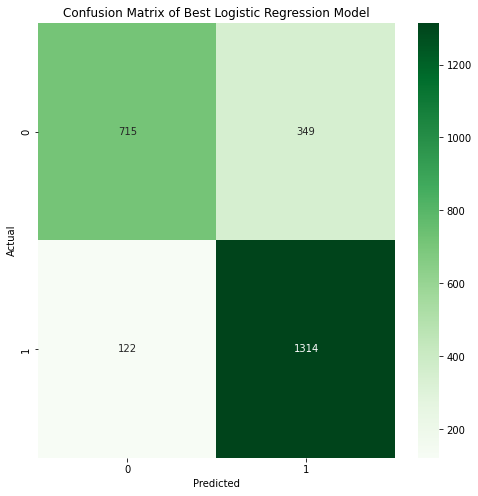

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Best Logistic Regression Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    
    # 1. Create the  KNeighborsClassifier model object below and assign to variable 'model'
    # YOUR CODE HERE
    model = KNeighborsClassifier(n_neighbors=k)

    # 2. Fit the model to the training data below
    # YOUR CODE HERE
    model.fit(X_train, y_train) 
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    # YOUR CODE HERE
    class_label_predictions= model.predict(X_test) 

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    # YOUR CODE HERE
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    
    return acc_score

In [ ]:
k_values = [10, 100, 1000]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))

k=10, accuracy score: 0.8584
k=100, accuracy score: 0.8328
k=1000, accuracy score: 0.7724


In [ ]:
k_values = [1,5,10]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))

k=1, accuracy score: 0.8292
k=5, accuracy score: 0.862
k=10, accuracy score: 0.8584


In [ ]:
k_values = [5,6,7,8,9,10]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))

k=5, accuracy score: 0.862
k=6, accuracy score: 0.864
k=7, accuracy score: 0.8628
k=8, accuracy score: 0.8624
k=9, accuracy score: 0.8616
k=10, accuracy score: 0.8584


In [ ]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10]
weights = ["uniform","distance"]
leaf = [30,60,90]
algorithm = ["kd_tree", "ball_tree"]
# Create the random grid
peram_grid = {
               'n_neighbors': n_neighbors,
              
               'weights':weights,
            
              "algorithm": algorithm,
               'leaf_size': leaf}

In [ ]:
kn =KNeighborsClassifier()
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)
gs_1 = GridSearchCV(estimator=kn,
                  param_grid=peram_grid,
                  scoring=roc_auc_scorer,
                  cv=10,
                  n_jobs=-1)
gs_1.fit(X_train, y_train)
print("max roc_auc_score and hyperperam: ")

max roc_auc_score and hyperperam: 


In [ ]:
print("tuned hpyerparameters :(best parameters) ",gs_1.best_params_)
print("accuracy :",gs_1.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'distance'}
accuracy : 0.9258024957692103


In [ ]:
optimised_nei = gs_1.best_estimator_
print(optimised_nei)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10, weights='distance')


In [ ]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

# YOUR CODE HERE
model_1 = optimised_nei

# 2. Fit the model to the training data below

# YOUR CODE HERE
model_1.fit(X_train, y_train)


# YOUR CODE HERE
class_label_predictions= model_1.predict(X_test)
print(roc_auc_score(y_test, model_1.predict_proba(X_test)[:,1]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result 
# to the variable 'acc_score' below

# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

0.9301507162753682
Accuracy: 0.8632


In [ ]:

y_pred = model_1.predict(X_test)
pr = precision_score(y_test, y_pred)
print(pr)

r = recall_score(y_test, y_pred)
print(r)

0.8393300248138957
0.942200557103064


In [ ]:
from sklearn.metrics import f1_score

f = f1_score(y_test, y_pred)
print(f)

0.8877952755905512


In [ ]:
pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlflow
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
def train(params):
  """
  This is our main training function which we pass to Hyperopt.
  It takes in hyperparameter settings, fits a model based on those settings,
  evaluates the model, and returns the loss.

  :param params: map specifying the hyperparameter settings to test
  :return: loss for the fitted model
  """
  # We will tune 2 hyperparameters:
  #  regularization and the penalty type (L1 vs L2).
  regParam = float(params['regParam'])
  penalty = params['penalty']
  dual = params["dual"]
  fit_intercept = params["fit_intercept"]

  # Turn up tolerance for faster convergence
  clf = LogisticRegression(C=1.0 / regParam,
                           multi_class='multinomial',
                           penalty=penalty, solver='saga', tol=0.1)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)

  return {'loss': -score, 'status': STATUS_OK}

# Next, define a search space for Hyperopt.
search_space = {
  'penalty': hp.choice('penalty', ['l1', 'l2']),
  'regParam': hp.loguniform('regParam', -10.0, 0),
  "dual": hp.choice("dual", [True,False]),
  "fit_intercept": hp.choice("fit_intercept", [True,False])
}

# Select a search algorithm for Hyperopt to use.
algo=tpe.suggest  # Tree of Parzen Estimators, a Bayesian method

# We can run Hyperopt locally (only on the driver machine)
# by calling `fmin` without an explicit `trials` argument.
best_hyperparameters = fmin(
  fn=train,
  space=search_space,
  algo=algo,
  max_evals=32)
best_hyperparameters

# We can distribute tuning across our Spark cluster
# by calling `fmin` with a `SparkTrials` instance.
spark_trials = Trials()
best_hyperparameters = fmin(
  fn=train,
  space=search_space,
  algo=algo,
  trials=spark_trials,
  max_evals=32)
best_hyperparameters

  0%|          | 0/32 [00:00<?, ?it/s, best loss: ?]

INFO:hyperopt.tpe:tpe_transform took 0.002528 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:tpe_transform took 0.002300 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.798400
INFO:hyperopt.tpe:tpe_transform took 0.003266 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.798400


  9%|▉         | 3/32 [00:00<00:00, 29.20it/s, best loss: -0.8]

INFO:hyperopt.tpe:tpe_transform took 0.002950 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.800000
INFO:hyperopt.tpe:tpe_transform took 0.002353 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.800000
INFO:hyperopt.tpe:tpe_transform took 0.002754 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.802000


 19%|█▉        | 6/32 [00:00<00:00, 28.65it/s, best loss: -0.8052]

INFO:hyperopt.tpe:tpe_transform took 0.002428 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.805200
INFO:hyperopt.tpe:tpe_transform took 0.002352 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002379 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.805600


 28%|██▊       | 9/32 [00:00<00:00, 27.21it/s, best loss: -0.8056]

INFO:hyperopt.tpe:tpe_transform took 0.002517 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002330 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002341 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.805600


 38%|███▊      | 12/32 [00:00<00:00, 27.58it/s, best loss: -0.8056]

INFO:hyperopt.tpe:tpe_transform took 0.002430 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002338 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002369 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.805600


 47%|████▋     | 15/32 [00:00<00:00, 27.11it/s, best loss: -0.8056]

INFO:hyperopt.tpe:tpe_transform took 0.002434 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002324 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002327 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.805600


 56%|█████▋    | 18/32 [00:00<00:00, 26.77it/s, best loss: -0.8056]

INFO:hyperopt.tpe:tpe_transform took 0.002384 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002302 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002314 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.806000


 66%|██████▌   | 21/32 [00:00<00:00, 26.74it/s, best loss: -0.806] 

INFO:hyperopt.tpe:tpe_transform took 0.002419 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.806000
INFO:hyperopt.tpe:tpe_transform took 0.002377 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.806000
INFO:hyperopt.tpe:tpe_transform took 0.002311 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.806000


 75%|███████▌  | 24/32 [00:00<00:00, 25.38it/s, best loss: -0.806]

INFO:hyperopt.tpe:tpe_transform took 0.002870 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.806000
INFO:hyperopt.tpe:tpe_transform took 0.002353 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.806000
INFO:hyperopt.tpe:tpe_transform took 0.002370 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.806000


 84%|████████▍ | 27/32 [00:01<00:00, 23.07it/s, best loss: -0.806]

INFO:hyperopt.tpe:tpe_transform took 0.002419 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.806000
INFO:hyperopt.tpe:tpe_transform took 0.002304 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.806000
INFO:hyperopt.tpe:tpe_transform took 0.002307 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.806000


 94%|█████████▍| 30/32 [00:01<00:00, 21.59it/s, best loss: -0.806]

INFO:hyperopt.tpe:tpe_transform took 0.002772 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.806000
INFO:hyperopt.tpe:tpe_transform took 0.002391 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.806000


  0%|          | 0/32 [00:00<?, ?it/s, best loss: ?]

INFO:hyperopt.tpe:tpe_transform took 0.002261 seconds
INFO:hyperopt.tpe:TPE using 0 trials
INFO:hyperopt.tpe:tpe_transform took 0.002484 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.803200


  6%|▋         | 2/32 [00:00<00:02, 14.31it/s, best loss: -0.8056]

INFO:hyperopt.tpe:tpe_transform took 0.002328 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002338 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.805600


 12%|█▎        | 4/32 [00:00<00:01, 16.58it/s, best loss: -0.8056]

INFO:hyperopt.tpe:tpe_transform took 0.002520 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.003351 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002313 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.805600


 22%|██▏       | 7/32 [00:00<00:01, 19.14it/s, best loss: -0.8056]

INFO:hyperopt.tpe:tpe_transform took 0.002357 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002350 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002331 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.805600


 31%|███▏      | 10/32 [00:00<00:01, 20.67it/s, best loss: -0.8056]

INFO:hyperopt.tpe:tpe_transform took 0.002386 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002329 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002331 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.805600


 41%|████      | 13/32 [00:00<00:00, 20.21it/s, best loss: -0.8056]

INFO:hyperopt.tpe:tpe_transform took 0.006190 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002301 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.805600
INFO:hyperopt.tpe:tpe_transform took 0.002329 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.805600


 50%|█████     | 16/32 [00:00<00:00, 20.90it/s, best loss: -0.8068]

INFO:hyperopt.tpe:tpe_transform took 0.002375 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.806800
INFO:hyperopt.tpe:tpe_transform took 0.002391 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.806800
INFO:hyperopt.tpe:tpe_transform took 0.002304 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.806800


 59%|█████▉    | 19/32 [00:00<00:00, 20.43it/s, best loss: -0.8068]

INFO:hyperopt.tpe:tpe_transform took 0.004090 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.806800
INFO:hyperopt.tpe:tpe_transform took 0.002315 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.806800
INFO:hyperopt.tpe:tpe_transform took 0.002312 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.806800


 69%|██████▉   | 22/32 [00:01<00:00, 17.65it/s, best loss: -0.8068]

INFO:hyperopt.tpe:tpe_transform took 0.002695 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.806800
INFO:hyperopt.tpe:tpe_transform took 0.002390 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.806800
INFO:hyperopt.tpe:tpe_transform took 0.002251 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.806800


 78%|███████▊  | 25/32 [00:01<00:00, 17.81it/s, best loss: -0.8068]

INFO:hyperopt.tpe:tpe_transform took 0.002539 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.806800
INFO:hyperopt.tpe:tpe_transform took 0.002303 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.806800


 84%|████████▍ | 27/32 [00:01<00:00, 17.43it/s, best loss: -0.8068]

INFO:hyperopt.tpe:tpe_transform took 0.002522 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.806800
INFO:hyperopt.tpe:tpe_transform took 0.002368 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.809600


 91%|█████████ | 29/32 [00:01<00:00, 17.69it/s, best loss: -0.8096]

INFO:hyperopt.tpe:tpe_transform took 0.002530 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.809600
INFO:hyperopt.tpe:tpe_transform took 0.002316 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.809600
INFO:hyperopt.tpe:tpe_transform took 0.002371 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.809600


100%|██████████| 32/32 [00:01<00:00, 18.63it/s, best loss: -0.8096]


{'dual': 1, 'fit_intercept': 1, 'penalty': 1, 'regParam': 0.06124786298435617}

In [ ]:
from sklearn.model_selection import cross_val_score
def objective(params):
    classifier_type = params['type']
    del params['type']
    if classifier_type == 'logreg':
        clf = LogisticRegression(**params)
    else:
        return 0
    accuracy = cross_val_score(clf, X_train, y_train).mean()
    
    # Because fmin() tries to minimize the objective, this function must return the negative accuracy. 
    return {'loss': -accuracy, 'status': STATUS_OK}

In [ ]:
search_space = hp.choice('classifier_type', [
    {
        'type': 'logreg',
        'C': hp.lognormal('LR_C', 0, 1.0),
        'solver': hp.choice('solver', ['liblinear', 'lbfgs']),
        
    },
])

algo=tpe.suggest
spark_trials = Trials()


with mlflow.start_run():
  best_result = fmin(
    fn=objective, 
    space=search_space,
    algo=algo,
    max_evals=32,
    trials=spark_trials)

  0%|          | 0/32 [00:00<?, ?it/s, best loss: ?]

INFO:hyperopt.tpe:tpe_transform took 0.002481 seconds
INFO:hyperopt.tpe:TPE using 0 trials


  3%|▎         | 1/32 [00:00<00:20,  1.50it/s, best loss: -0.8087754503002001]

INFO:hyperopt.tpe:tpe_transform took 0.002008 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.808775


  6%|▋         | 2/32 [00:01<00:26,  1.12it/s, best loss: -0.8089087836335335]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

INFO:hyperopt.tpe:tpe_transform took 0.001575 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

  9%|▉         | 3/32 [00:02<00:27,  1.05it/s, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001856 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.808909


 12%|█▎        | 4/32 [00:03<00:22,  1.24it/s, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001868 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.808909


 16%|█▌        | 5/32 [00:03<00:15,  1.76it/s, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001554 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.808909


 19%|█▉        | 6/32 [00:04<00:15,  1.71it/s, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.003703 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.808909


 22%|██▏       | 7/32 [00:04<00:11,  2.22it/s, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001570 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 25%|██▌       | 8/32 [00:05<00:17,  1.39it/s, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.002257 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 28%|██▊       | 9/32 [00:07<00:24,  1.08s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001528 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.808909


 31%|███▏      | 10/32 [00:07<00:17,  1.24it/s, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001813 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.808909


 34%|███▍      | 11/32 [00:07<00:13,  1.58it/s, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.002527 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for altern

 38%|███▊      | 12/32 [00:09<00:20,  1.00s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.004633 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.808909


 41%|████      | 13/32 [00:10<00:15,  1.26it/s, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001649 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 44%|████▍     | 14/32 [00:11<00:20,  1.12s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.004015 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.808909


 47%|████▋     | 15/32 [00:12<00:14,  1.17it/s, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001885 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 50%|█████     | 16/32 [00:13<00:18,  1.13s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001960 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for altern

 53%|█████▎    | 17/32 [00:15<00:20,  1.34s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.002592 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.808909


 56%|█████▋    | 18/32 [00:17<00:18,  1.34s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001554 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.808909


 59%|█████▉    | 19/32 [00:17<00:13,  1.03s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.002717 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 62%|██████▎   | 20/32 [00:19<00:16,  1.36s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.008374 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.808909


 66%|██████▌   | 21/32 [00:21<00:15,  1.44s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001922 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for altern

 69%|██████▉   | 22/32 [00:23<00:16,  1.60s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.003994 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.808909


 72%|███████▏  | 23/32 [00:25<00:15,  1.73s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001844 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 75%|███████▌  | 24/32 [00:27<00:14,  1.85s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.002190 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 78%|███████▊  | 25/32 [00:29<00:12,  1.83s/it, best loss: -0.8089087836335335]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

INFO:hyperopt.tpe:tpe_transform took 0.002022 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.808909


 81%|████████▏ | 26/32 [00:31<00:12,  2.03s/it, best loss: -0.8089087836335335]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

INFO:hyperopt.tpe:tpe_transform took 0.006232 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.808909


 84%|████████▍ | 27/32 [00:33<00:09,  1.94s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001632 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.808909
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 88%|████████▊ | 28/32 [00:35<00:07,  1.88s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001947 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.808909


 91%|█████████ | 29/32 [00:36<00:05,  1.76s/it, best loss: -0.8089087836335335]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

INFO:hyperopt.tpe:tpe_transform took 0.001858 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.808909


 94%|█████████▍| 30/32 [00:38<00:03,  1.71s/it, best loss: -0.8089087836335335]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

INFO:hyperopt.tpe:tpe_transform took 0.005228 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.808909


 97%|█████████▋| 31/32 [00:39<00:01,  1.54s/it, best loss: -0.8089087836335335]

INFO:hyperopt.tpe:tpe_transform took 0.001838 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.808909


100%|██████████| 32/32 [00:39<00:00,  1.25s/it, best loss: -0.8089087836335335]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _ch

In [ ]:
import hyperopt
print(hyperopt.space_eval(search_space, best_result))

{'C': 0.9679675998916147, 'solver': 'lbfgs', 'type': 'logreg'}


In [ ]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

# YOUR CODE HERE
model = LogisticRegression(C=0.9679675998916147, solver = "lbfgs")

# 2. Fit the model to the training data below

# YOUR CODE HERE
model.fit(X_train, y_train)


# YOUR CODE HERE
class_label_predictions= model.predict(X_test)
print(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result 
# to the variable 'acc_score' below

# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

0.8897826695918067
Accuracy: 0.8116


In [ ]:
from sklearn.metrics import precision_score
y_pred = model.predict(X_test)
pr = precision_score(y_test, y_pred)
print(pr)
from sklearn.metrics import recall_score
r = recall_score(y_test, y_pred)
print(r)

0.7901383042693927
0.915041782729805


In [ ]:
from sklearn.metrics import f1_score

f = f1_score(y_test, y_pred)
print(f)

0.8480154888673767


In [ ]:
def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()
space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,10)),
    "weights" : hp.choice("weights", ["uniform","distance"]),
    "leaf_size" : hp.choice('leaf_size', range(30,90)),
    "algorithm" : hp.choice("algorithm",["kd_tree", "ball_tree"])
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

INFO:hyperopt.tpe:tpe_transform took 0.009128 seconds
INFO:hyperopt.tpe:TPE using 0 trials


  1%|          | 1/100 [00:00<01:00,  1.63it/s, best loss: -0.6695579789894948]

INFO:hyperopt.tpe:tpe_transform took 0.007476 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.669558


  2%|▏         | 2/100 [00:00<00:43,  2.23it/s, best loss: -0.681660180090045] 

INFO:hyperopt.tpe:tpe_transform took 0.006753 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.681660


  3%|▎         | 3/100 [00:01<00:43,  2.21it/s, best loss: -0.681660180090045]

INFO:hyperopt.tpe:tpe_transform took 0.006533 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.681660


  4%|▍         | 4/100 [00:02<00:49,  1.94it/s, best loss: -0.7290661830915457]

INFO:hyperopt.tpe:tpe_transform took 0.007841 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.729066


  5%|▌         | 5/100 [00:02<00:48,  1.97it/s, best loss: -0.7290661830915457]

INFO:hyperopt.tpe:tpe_transform took 0.007454 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.729066


  6%|▌         | 6/100 [00:03<00:47,  1.98it/s, best loss: -0.7290661830915457]

INFO:hyperopt.tpe:tpe_transform took 0.010758 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.729066


  7%|▋         | 7/100 [00:03<00:53,  1.74it/s, best loss: -0.7290661830915457]

INFO:hyperopt.tpe:tpe_transform took 0.006781 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.729066


  8%|▊         | 8/100 [00:04<00:56,  1.63it/s, best loss: -0.7350669334667334]

INFO:hyperopt.tpe:tpe_transform took 0.007545 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.735067


  9%|▉         | 9/100 [00:04<00:50,  1.80it/s, best loss: -0.7350669334667334]

INFO:hyperopt.tpe:tpe_transform took 0.006401 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.735067


 10%|█         | 10/100 [00:05<00:55,  1.62it/s, best loss: -0.7471673336668334]

INFO:hyperopt.tpe:tpe_transform took 0.007624 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.747167


 11%|█         | 11/100 [00:06<00:54,  1.65it/s, best loss: -0.7471673336668334]

INFO:hyperopt.tpe:tpe_transform took 0.005940 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.747167


 12%|█▏        | 12/100 [00:06<00:52,  1.67it/s, best loss: -0.7471673336668334]

INFO:hyperopt.tpe:tpe_transform took 0.008429 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.747167


 13%|█▎        | 13/100 [00:07<00:54,  1.61it/s, best loss: -0.7471673336668334]

INFO:hyperopt.tpe:tpe_transform took 0.007477 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.747167


 14%|█▍        | 14/100 [00:07<00:50,  1.69it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.013137 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.748668


 15%|█▌        | 15/100 [00:08<00:44,  1.93it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006212 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.748668


 16%|█▌        | 16/100 [00:08<00:42,  1.97it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006595 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.748668


 17%|█▋        | 17/100 [00:09<00:42,  1.96it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007231 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.748668


 18%|█▊        | 18/100 [00:09<00:40,  2.04it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.009063 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.748668


 19%|█▉        | 19/100 [00:10<00:46,  1.75it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.004158 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.748668


 20%|██        | 20/100 [00:11<00:45,  1.74it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007652 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.748668


 21%|██        | 21/100 [00:11<00:49,  1.59it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007879 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.748668


 22%|██▏       | 22/100 [00:12<00:46,  1.68it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.004198 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.748668


 23%|██▎       | 23/100 [00:12<00:43,  1.75it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007282 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.748668


 24%|██▍       | 24/100 [00:13<00:42,  1.80it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007049 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.748668


 25%|██▌       | 25/100 [00:13<00:40,  1.83it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008207 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.748668


 26%|██▌       | 26/100 [00:14<00:39,  1.85it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007329 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.748668


 27%|██▋       | 27/100 [00:14<00:39,  1.87it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007741 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.748668


 28%|██▊       | 28/100 [00:15<00:38,  1.87it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007394 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.748668


 29%|██▉       | 29/100 [00:16<00:37,  1.88it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007831 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.748668


 30%|███       | 30/100 [00:16<00:37,  1.88it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007882 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.748668


 31%|███       | 31/100 [00:16<00:32,  2.10it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.004325 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.748668


 32%|███▏      | 32/100 [00:17<00:31,  2.15it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.009802 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.748668


 33%|███▎      | 33/100 [00:17<00:28,  2.32it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.005133 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.748668


 34%|███▍      | 34/100 [00:18<00:29,  2.23it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008776 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.748668


 35%|███▌      | 35/100 [00:18<00:30,  2.16it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.005567 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.748668


 36%|███▌      | 36/100 [00:19<00:27,  2.35it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006486 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.748668


 37%|███▋      | 37/100 [00:19<00:27,  2.30it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006989 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.748668


 38%|███▊      | 38/100 [00:19<00:28,  2.20it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008653 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.748668


 39%|███▉      | 39/100 [00:20<00:26,  2.27it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007609 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.748668


 40%|████      | 40/100 [00:20<00:27,  2.15it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006927 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.748668


 41%|████      | 41/100 [00:21<00:25,  2.32it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006619 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.748668


 42%|████▏     | 42/100 [00:21<00:26,  2.18it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.004255 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.748668


 43%|████▎     | 43/100 [00:22<00:29,  1.91it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007334 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.748668


 44%|████▍     | 44/100 [00:22<00:26,  2.11it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008179 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.748668


 45%|████▌     | 45/100 [00:23<00:29,  1.89it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.005330 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.748668


 46%|████▌     | 46/100 [00:24<00:28,  1.88it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007523 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.748668


 47%|████▋     | 47/100 [00:24<00:27,  1.91it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008667 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.748668


 48%|████▊     | 48/100 [00:25<00:28,  1.85it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008506 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.748668


 49%|████▉     | 49/100 [00:25<00:26,  1.89it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007475 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.748668


 50%|█████     | 50/100 [00:26<00:25,  1.98it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007732 seconds
INFO:hyperopt.tpe:TPE using 50/50 trials with best loss -0.748668


 51%|█████     | 51/100 [00:26<00:28,  1.71it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.010487 seconds
INFO:hyperopt.tpe:TPE using 51/51 trials with best loss -0.748668


 52%|█████▏    | 52/100 [00:27<00:24,  1.94it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006799 seconds
INFO:hyperopt.tpe:TPE using 52/52 trials with best loss -0.748668


 53%|█████▎    | 53/100 [00:27<00:26,  1.77it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008354 seconds
INFO:hyperopt.tpe:TPE using 53/53 trials with best loss -0.748668


 54%|█████▍    | 54/100 [00:28<00:24,  1.91it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007740 seconds
INFO:hyperopt.tpe:TPE using 54/54 trials with best loss -0.748668


 55%|█████▌    | 55/100 [00:28<00:22,  1.98it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008185 seconds
INFO:hyperopt.tpe:TPE using 55/55 trials with best loss -0.748668


 56%|█████▌    | 56/100 [00:29<00:20,  2.18it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.009510 seconds
INFO:hyperopt.tpe:TPE using 56/56 trials with best loss -0.748668


 57%|█████▋    | 57/100 [00:29<00:23,  1.85it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007661 seconds
INFO:hyperopt.tpe:TPE using 57/57 trials with best loss -0.748668


 58%|█████▊    | 58/100 [00:30<00:21,  1.95it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007342 seconds
INFO:hyperopt.tpe:TPE using 58/58 trials with best loss -0.748668


 59%|█████▉    | 59/100 [00:30<00:20,  2.04it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008155 seconds
INFO:hyperopt.tpe:TPE using 59/59 trials with best loss -0.748668


 60%|██████    | 60/100 [00:31<00:19,  2.00it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007010 seconds
INFO:hyperopt.tpe:TPE using 60/60 trials with best loss -0.748668


 61%|██████    | 61/100 [00:31<00:20,  1.88it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008929 seconds
INFO:hyperopt.tpe:TPE using 61/61 trials with best loss -0.748668


 62%|██████▏   | 62/100 [00:32<00:18,  2.02it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007734 seconds
INFO:hyperopt.tpe:TPE using 62/62 trials with best loss -0.748668


 63%|██████▎   | 63/100 [00:32<00:19,  1.89it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006918 seconds
INFO:hyperopt.tpe:TPE using 63/63 trials with best loss -0.748668


 64%|██████▍   | 64/100 [00:33<00:18,  1.98it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008852 seconds
INFO:hyperopt.tpe:TPE using 64/64 trials with best loss -0.748668


 65%|██████▌   | 65/100 [00:33<00:18,  1.88it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006897 seconds
INFO:hyperopt.tpe:TPE using 65/65 trials with best loss -0.748668


 66%|██████▌   | 66/100 [00:34<00:17,  1.91it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008189 seconds
INFO:hyperopt.tpe:TPE using 66/66 trials with best loss -0.748668


 67%|██████▋   | 67/100 [00:34<00:16,  1.97it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006783 seconds
INFO:hyperopt.tpe:TPE using 67/67 trials with best loss -0.748668


 68%|██████▊   | 68/100 [00:35<00:16,  1.96it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007615 seconds
INFO:hyperopt.tpe:TPE using 68/68 trials with best loss -0.748668


 69%|██████▉   | 69/100 [00:35<00:15,  1.94it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007152 seconds
INFO:hyperopt.tpe:TPE using 69/69 trials with best loss -0.748668


 70%|███████   | 70/100 [00:36<00:14,  2.02it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007608 seconds
INFO:hyperopt.tpe:TPE using 70/70 trials with best loss -0.748668


 71%|███████   | 71/100 [00:36<00:14,  1.98it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007646 seconds
INFO:hyperopt.tpe:TPE using 71/71 trials with best loss -0.748668


 72%|███████▏  | 72/100 [00:37<00:14,  1.98it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006709 seconds
INFO:hyperopt.tpe:TPE using 72/72 trials with best loss -0.748668


 73%|███████▎  | 73/100 [00:37<00:13,  1.98it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007416 seconds
INFO:hyperopt.tpe:TPE using 73/73 trials with best loss -0.748668


 74%|███████▍  | 74/100 [00:38<00:12,  2.04it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006320 seconds
INFO:hyperopt.tpe:TPE using 74/74 trials with best loss -0.748668


 75%|███████▌  | 75/100 [00:38<00:11,  2.12it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006717 seconds
INFO:hyperopt.tpe:TPE using 75/75 trials with best loss -0.748668


 76%|███████▌  | 76/100 [00:39<00:11,  2.05it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007757 seconds
INFO:hyperopt.tpe:TPE using 76/76 trials with best loss -0.748668


 77%|███████▋  | 77/100 [00:39<00:11,  2.01it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008906 seconds
INFO:hyperopt.tpe:TPE using 77/77 trials with best loss -0.748668


 78%|███████▊  | 78/100 [00:40<00:10,  2.05it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007777 seconds
INFO:hyperopt.tpe:TPE using 78/78 trials with best loss -0.748668


 79%|███████▉  | 79/100 [00:40<00:10,  2.03it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007147 seconds
INFO:hyperopt.tpe:TPE using 79/79 trials with best loss -0.748668


 80%|████████  | 80/100 [00:41<00:08,  2.25it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007424 seconds
INFO:hyperopt.tpe:TPE using 80/80 trials with best loss -0.748668


 81%|████████  | 81/100 [00:41<00:08,  2.13it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006349 seconds
INFO:hyperopt.tpe:TPE using 81/81 trials with best loss -0.748668


 82%|████████▏ | 82/100 [00:42<00:09,  1.86it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008843 seconds
INFO:hyperopt.tpe:TPE using 82/82 trials with best loss -0.748668


 83%|████████▎ | 83/100 [00:42<00:09,  1.88it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008614 seconds
INFO:hyperopt.tpe:TPE using 83/83 trials with best loss -0.748668


 84%|████████▍ | 84/100 [00:43<00:07,  2.09it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007688 seconds
INFO:hyperopt.tpe:TPE using 84/84 trials with best loss -0.748668


 85%|████████▌ | 85/100 [00:43<00:06,  2.19it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008194 seconds
INFO:hyperopt.tpe:TPE using 85/85 trials with best loss -0.748668


 86%|████████▌ | 86/100 [00:44<00:06,  2.19it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007741 seconds
INFO:hyperopt.tpe:TPE using 86/86 trials with best loss -0.748668


 87%|████████▋ | 87/100 [00:44<00:07,  1.81it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007695 seconds
INFO:hyperopt.tpe:TPE using 87/87 trials with best loss -0.748668


 88%|████████▊ | 88/100 [00:45<00:06,  1.85it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008103 seconds
INFO:hyperopt.tpe:TPE using 88/88 trials with best loss -0.748668


 89%|████████▉ | 89/100 [00:45<00:05,  1.88it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008424 seconds
INFO:hyperopt.tpe:TPE using 89/89 trials with best loss -0.748668


 90%|█████████ | 90/100 [00:46<00:04,  2.11it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006523 seconds
INFO:hyperopt.tpe:TPE using 90/90 trials with best loss -0.748668


 91%|█████████ | 91/100 [00:46<00:05,  1.80it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008094 seconds
INFO:hyperopt.tpe:TPE using 91/91 trials with best loss -0.748668


 92%|█████████▏| 92/100 [00:47<00:04,  1.91it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007507 seconds
INFO:hyperopt.tpe:TPE using 92/92 trials with best loss -0.748668


 93%|█████████▎| 93/100 [00:47<00:03,  1.91it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007211 seconds
INFO:hyperopt.tpe:TPE using 93/93 trials with best loss -0.748668


 94%|█████████▍| 94/100 [00:48<00:03,  1.89it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007760 seconds
INFO:hyperopt.tpe:TPE using 94/94 trials with best loss -0.748668


 95%|█████████▌| 95/100 [00:49<00:02,  1.81it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007026 seconds
INFO:hyperopt.tpe:TPE using 95/95 trials with best loss -0.748668


 96%|█████████▌| 96/100 [00:49<00:02,  1.84it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008879 seconds
INFO:hyperopt.tpe:TPE using 96/96 trials with best loss -0.748668


 97%|█████████▋| 97/100 [00:50<00:01,  1.86it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.007657 seconds
INFO:hyperopt.tpe:TPE using 97/97 trials with best loss -0.748668


 98%|█████████▊| 98/100 [00:50<00:01,  1.91it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.008203 seconds
INFO:hyperopt.tpe:TPE using 98/98 trials with best loss -0.748668


 99%|█████████▉| 99/100 [00:51<00:00,  2.00it/s, best loss: -0.7486675837918959]

INFO:hyperopt.tpe:tpe_transform took 0.006685 seconds
INFO:hyperopt.tpe:TPE using 99/99 trials with best loss -0.748668


100%|██████████| 100/100 [00:51<00:00,  1.93it/s, best loss: -0.7486675837918959]
best:
{'algorithm': 1, 'leaf_size': 50, 'n_neighbors': 8, 'weights': 1}


In [ ]:
# YOUR CODE HERE
model = KNeighborsClassifier(n_neighbors=8, weights='distance', algorithm="ball_tree",leaf_size=50)

# 2. Fit the model to the training data below

# YOUR CODE HERE
model.fit(X_train, y_train)


# YOUR CODE HERE
class_label_predictions= model.predict(X_test)
print(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result 
# to the variable 'acc_score' below

# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

0.9278154910256141
Accuracy: 0.864


In [ ]:
from sklearn.metrics import precision_score
y_pred = model.predict(X_test)
pr = precision_score(y_test, y_pred)
print(pr)
from sklearn.metrics import recall_score
r = recall_score(y_test, y_pred)
print(r)

0.8378545006165228
0.9463788300835655


In [ ]:
from sklearn.metrics import f1_score

f = f1_score(y_test, y_pred)
print(f)

0.8888162197514716


true-negitive: 801 
false-positive: 263 
false-negative: 77 
true-positive: 1359


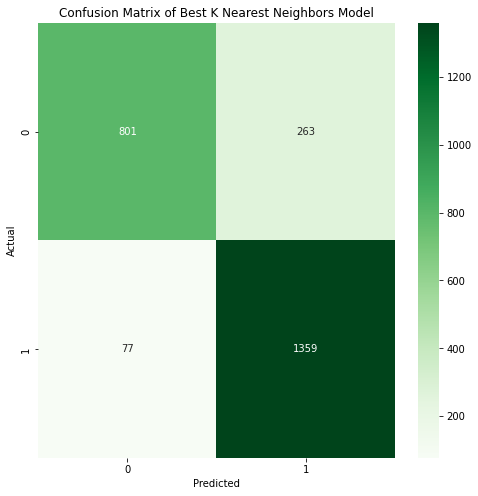

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Best K Nearest Neighbors Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
df['has_co'].value_counts()

0    8112
1    1887
Name: has_co, dtype: int64